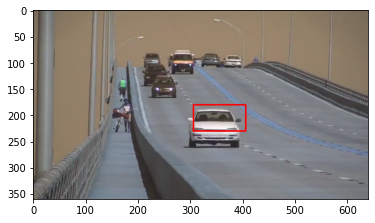

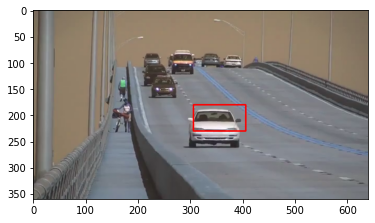

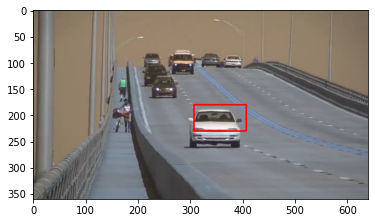

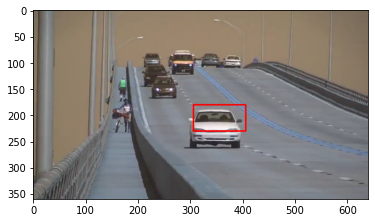

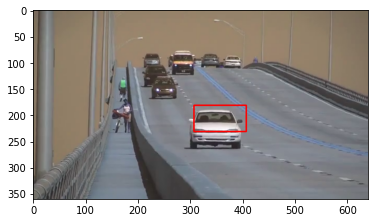

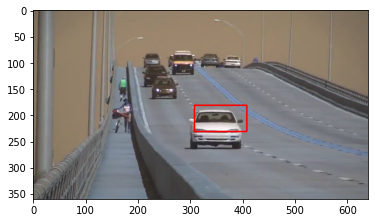

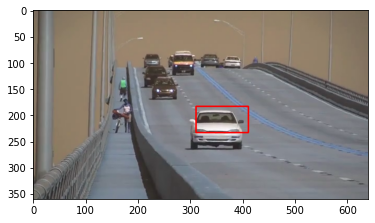

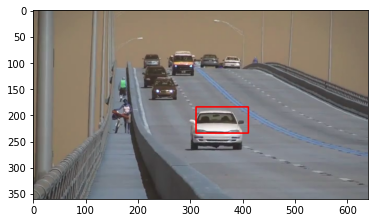

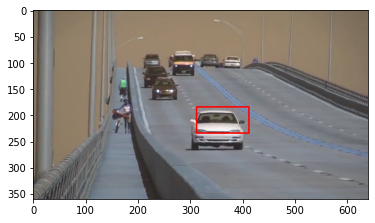

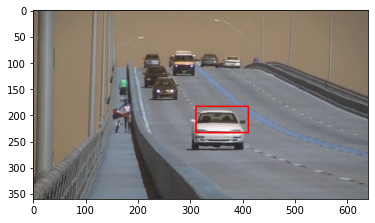

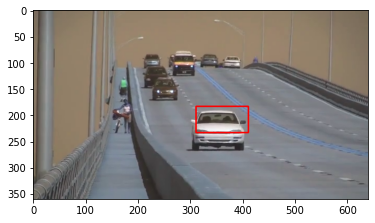

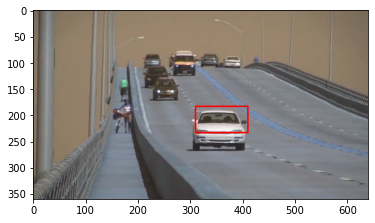

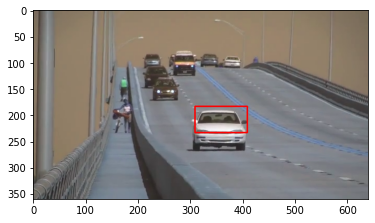

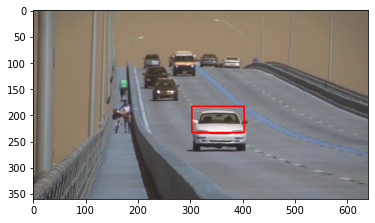

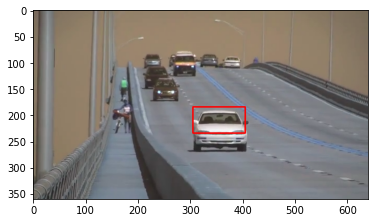

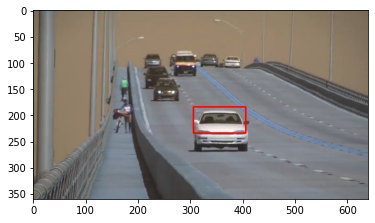

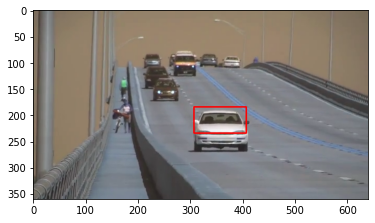

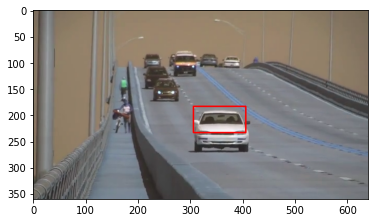

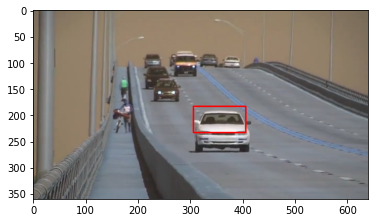

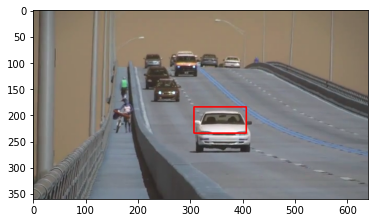

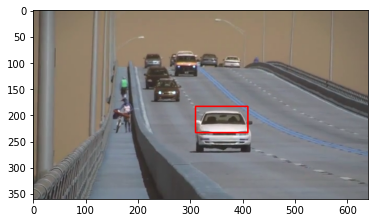

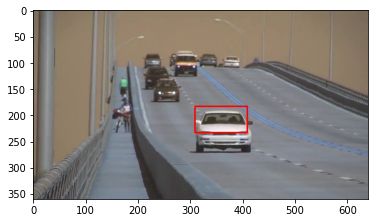

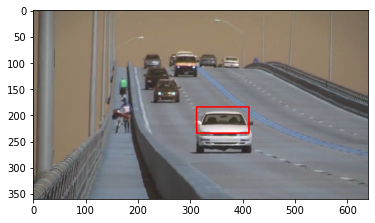

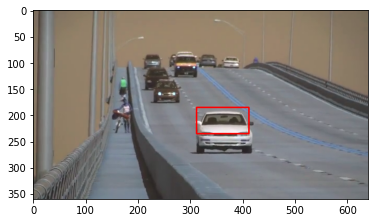

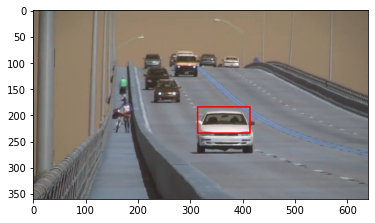

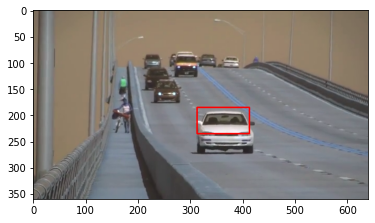

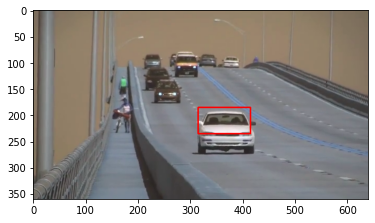

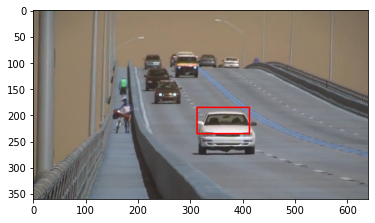

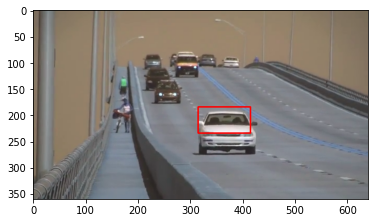

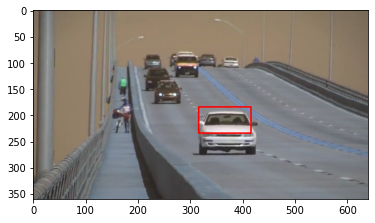

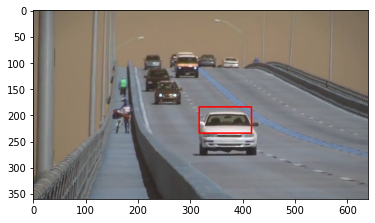

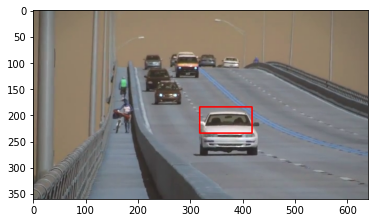

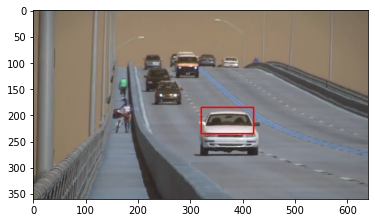

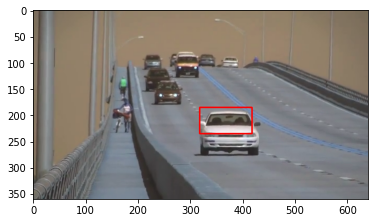

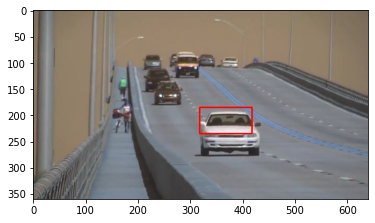

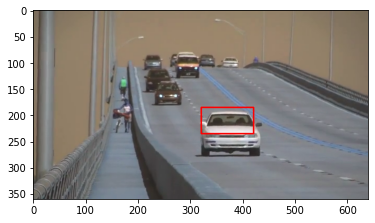

In [ ]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

cam = cv.VideoCapture('slow_traffic_small.mp4')
        # take first frame of the video
re, fr = cam.read()
        # setup initial location of window
x, y, w, h = 300, 200, 100, 50  # simply hardcoded the values
track_frame = (x, y, w, h)
        # set up the ROI for tracking
roisetup = fr[y:y + h, x:x + w]
hsvcolor_roi = cv.cvtColor(roisetup, cv.COLOR_BGR2HSV)
colormask = cv.inRange(hsvcolor_roi, np.array((0., 60., 31.)), np.array((180., 255., 255.)))
roicolor_hist = cv.calcHist([hsvcolor_roi], [0], colormask, [180], [0, 180])
cv.normalize(roicolor_hist, roicolor_hist, 0, 255, cv.NORM_MINMAX)
# Setup the termination criteria, either 14 iteration or move by atleast 2 pt
termination_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 14, 2)
while (1):
    re, fr = cam.read()
    if re == True:
        hsvcolor = cv.cvtColor(fr, cv.COLOR_BGR2HSV)
        dstcolor = cv.calcBackProject([hsvcolor], [0], roicolor_hist, [0, 180], 1)
                # apply meanshift to get the new larea
        re, track_frame = cv.meanShift(dstcolor, track_frame, termination_crit)
                # Draw it on image
        x, y, w, h = track_frame
        img2 = cv.rectangle(fr, (x, y), (x + w, y + h), 255, 2)
        plt.imshow(img2)
        plt.show()
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break